# Project 3

In [ ]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/ECE219/Project3'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/ECE219/Project3


In [ ]:
# import all 4 datasets
import pandas as pd
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

## Q1

#### Q1A


In [ ]:
user_id = ratings['userId'].values
total_users = len(set(user_id))
movie_id = ratings['movieId'].values
total_movies = len(set(movie_id))
rating = ratings['rating'].values

# sparsity
sparsity = len(rating)/(total_users*total_movies)
print(sparsity)

0.016999683055613623


####Q1B

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

(array([    0.,  1370.,  2811.,  1791.,  7551.,  5551., 20046., 13136.,
        26816., 21764.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

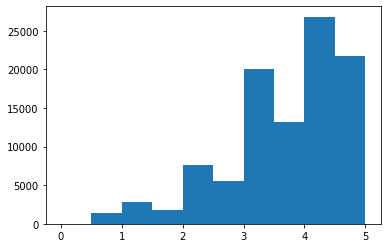

In [ ]:
# Histogram
bins = np.linspace(0,5,num=2*5+1)
plt.hist(rating,bins=bins)

#### Q1C


In [ ]:
from collections import Counter

In [ ]:
movie_count = Counter(movie_id)
movie_list = list(movie_count.values())
sort_movie = sorted(movie_list,reverse = True)
print(sort_movie)

[329, 317, 307, 279, 278, 251, 238, 237, 224, 220, 218, 215, 211, 204, 204, 203, 202, 201, 200, 198, 196, 192, 190, 189, 188, 188, 185, 183, 181, 179, 178, 177, 172, 171, 171, 170, 170, 165, 164, 162, 161, 159, 157, 149, 149, 146, 146, 145, 144, 144, 143, 143, 142, 141, 141, 140, 140, 140, 140, 137, 136, 135, 133, 133, 133, 133, 132, 132, 131, 131, 131, 131, 129, 129, 128, 126, 126, 125, 125, 124, 123, 123, 122, 122, 121, 121, 120, 120, 120, 120, 119, 119, 116, 116, 116, 115, 115, 115, 113, 112, 112, 111, 110, 110, 110, 110, 109, 109, 109, 109, 109, 108, 108, 107, 107, 107, 106, 106, 105, 105, 104, 104, 104, 104, 103, 103, 103, 102, 102, 102, 102, 101, 101, 101, 100, 100, 100, 100, 99, 99, 98, 97, 97, 97, 97, 97, 96, 96, 96, 96, 94, 94, 94, 93, 93, 93, 92, 92, 92, 92, 92, 92, 92, 91, 91, 91, 91, 91, 91, 90, 90, 89, 89, 88, 88, 88, 88, 88, 87, 87, 87, 87, 86, 86, 86, 86, 85, 85, 85, 84, 84, 84, 84, 84, 83, 83, 83, 82, 82, 82, 81, 81, 81, 81, 81, 81, 80, 80, 80, 80, 79, 79, 79, 79, 78, 7

Text(0, 0.5, 'Number of ratings the movie has received')

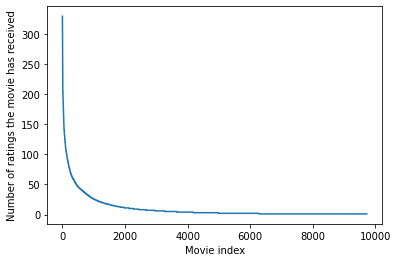

In [ ]:
plt.plot(sort_movie)
plt.xlabel('Movie index')
plt.ylabel('Number of ratings the movie has received')

#### Q1D


In [ ]:
users_count = Counter(user_id)
users_list = list(users_count.values())
sort_user = sorted(users_list,reverse = True)
print(sort_user)

[2698, 2478, 2108, 1864, 1346, 1302, 1260, 1218, 1115, 1055, 1046, 1027, 977, 975, 943, 939, 904, 879, 862, 836, 831, 763, 728, 728, 722, 703, 677, 648, 646, 635, 613, 608, 600, 578, 575, 570, 528, 520, 518, 517, 507, 505, 502, 500, 476, 474, 469, 467, 465, 458, 455, 446, 443, 443, 440, 437, 437, 436, 411, 403, 403, 400, 399, 398, 397, 386, 385, 383, 377, 371, 366, 363, 360, 359, 347, 345, 340, 334, 331, 314, 311, 310, 306, 300, 299, 294, 293, 292, 291, 289, 279, 279, 277, 275, 273, 271, 270, 269, 267, 267, 265, 260, 258, 255, 250, 248, 247, 242, 237, 236, 233, 232, 232, 231, 230, 227, 226, 226, 223, 221, 217, 216, 216, 215, 213, 210, 210, 208, 207, 204, 202, 202, 201, 200, 196, 194, 191, 190, 189, 188, 187, 187, 186, 185, 181, 180, 179, 177, 176, 174, 173, 168, 168, 168, 167, 167, 167, 165, 165, 164, 164, 163, 161, 157, 156, 155, 155, 155, 154, 152, 152, 152, 152, 150, 150, 150, 148, 141, 141, 141, 141, 140, 140, 140, 140, 139, 138, 138, 138, 135, 135, 135, 134, 133, 131, 131, 130, 12

Text(0, 0.5, 'Number of ratings the user has received')

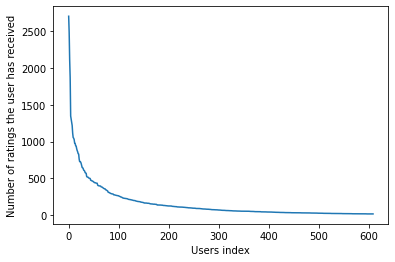

In [ ]:
plt.plot(sort_user)
plt.xlabel('Users index')
plt.ylabel('Number of ratings the user has received')

#### Q1F

In [ ]:
movie_id_set = set(movie_id)
movie_id_unique_list = list(movie_id_set)
variance = []

for i in range(len(movie_id_unique_list)):
  idx_list = []
  for index, value in enumerate(movie_id):
    if value == movie_id_unique_list[i]:
      idx_list.append(index) 
  var = np.var(np.array(rating[idx_list]))
  variance.append(var)

Text(0, 0.5, 'Number of movies')

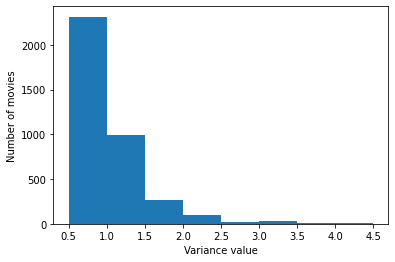

In [ ]:
plt.hist(variance,bins=np.arange(0.5,5,0.5))
plt.xlabel('Variance value')
plt.ylabel('Number of movies')

## Q4

In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.knns import KNNWithMeans

In [ ]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader=reader)

In [ ]:
rmse = []
mae = []
k = np.arange(2,102,2)
for index in k:
  print(f"k = {index}")
  knn = KNNWithMeans(k=index,sim_options={'name':'pearson'})
  perform = cross_validate(knn,measures=['rmse','mae'],data=data,cv=10)
  rmse.append(np.mean(perform['test_rmse']))
  mae.append(np.mean(perform['test_mae']))
 

k = 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
k = 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing simila

Text(0, 0.5, 'Error')

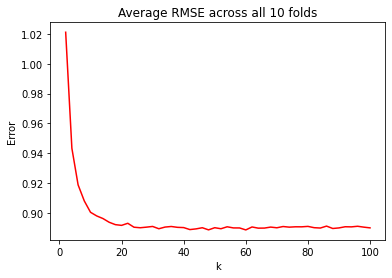

In [ ]:
plt.plot(k,rmse, 'r', label='RMSE')
plt.title("Average RMSE across all 10 folds")
plt.xlabel("k"); 
plt.ylabel("Error")

Text(0, 0.5, 'Error')

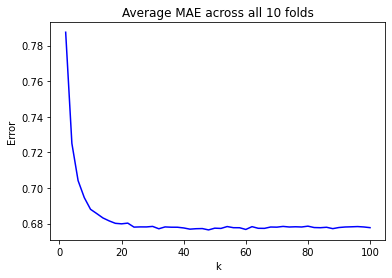

In [ ]:
plt.plot(k,mae, 'b', label='MSE')
plt.title("Average MAE across all 10 folds")
plt.xlabel("k"); 
plt.ylabel("Error")

## Q5

In [ ]:
# we define if the rmse or mse change between two k is smaller than 0.00005, 
# we say it is a steady state value
for i in range(len(rmse)):
  if abs(rmse[i]-rmse[i+1]) < 0.00005:
    print(f"minimum RMSE is {rmse[i]} at k = {i}")
    break

for j in range(len(mae)):
  if abs(mae[j]-mae[j+1]) < 0.00005:
    print(f"minimum MAE is {mae[j]} at k = {j}")  
    break


minimum RMSE is 0.8899184925416235 at k = 27
minimum MAE is 0.6781328951838483 at k = 12


## Q6

In [ ]:
from surprise.model_selection import train_test_split,KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from surprise import accuracy

In [ ]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader=reader)
K_fold = KFold(n_splits=10)
K_range = np.arange(2,102,2)

In [ ]:
threshold = [2.5,3,3.5,4]

In [ ]:
rate_dict = {}
for rate in data.raw_ratings:
    if rate[1] in rate_dict.keys():
        rate_dict[rate[1]].append(rate[2])
    else:
        rate_dict[rate[1]] = []
        rate_dict[rate[1]].append(rate[2])


In [ ]:
trainset, testset = train_test_split(data, test_size=0.1)
# untrimmed
untrimmed_mov = testset 
# popular movies
Pop_mov = []
for i in testset:
  if len(rate_dict[i[1]]) > 2:
    Pop_mov.append(i)


# unpop movies
Unpop_mov = []
for i in testset:
  if len(rate_dict[i[1]]) <= 2:
    Unpop_mov.append(i)

# high variance movies
data_p_table = ratings.pivot_table('rating', 'userId', 'movieId')
variance = np.var(data_p_table, axis=0)

High_var_mov = []
for i in testset:
  if i[1] in variance[variance>=2].keys() and len(rate_dict[i[1]]) >= 5:
    High_var_mov.append(i)




#### untrimmed dataset

In [ ]:
# sweep 
# for untrimmed testset  
rmse_untrimmed=[]
for k in K_range:
  print(f"k = {k}")
  rmse_knn = []
  for trainset, testset in K_fold.split(data):
      pred = KNNWithMeans(k=k,sim_options={'name':'pearson'}).fit(trainset).test(testset)
      rmse_knn.append(accuracy.rmse(pred))
  rmse_untrimmed.append(np.mean(rmse_knn))


k = 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0252
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0254
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0222
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0135
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0144
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0170
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0001
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0273
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0301
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0229
k = 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.950

Text(0.5, 1.0, 'untrimmed')

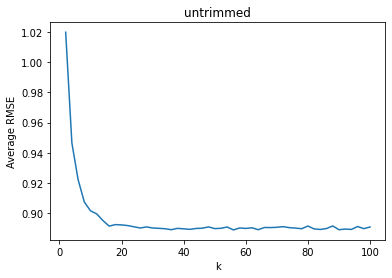

In [ ]:
plt.plot(K_range,rmse_untrimmed)
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('untrimmed')


In [ ]:
for i in range(len(rmse_untrimmed)):
  if abs(rmse_untrimmed[i]-rmse_untrimmed[i+1]) < 0.0001:
    print(f"minimum RMSE is {rmse_untrimmed[i]} at k = {i}")
    best_rmse = i
    break

minimum RMSE is 0.890581547127848 at k = 32


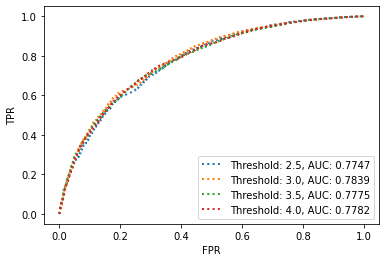

In [ ]:
# ROC Curves
trainset, testset = train_test_split(data, test_size=0.1)
# untrimmed
best_untrimmer = KNNWithMeans(k=best_rmse, sim_options={'name': 'pearson'}, verbose=False).fit(trainset).test(testset)

fig, ax = plt.subplots()
for th in threshold:
  y_true, y_pred = [], []
  for i in range(len(testset)):
    y_pred.append(best_untrimmer[i].est)
    if testset[i][2] >= th:
      y_true.append(1)
    else:
      y_true.append(0)

  fpr, tpr, _ = roc_curve(y_true, y_pred)
  auc_score = roc_auc_score(y_true, y_pred)
  ax.plot(fpr, tpr, label = 'Threshold: %.1f, AUC: %.4f' %(th,auc_score), linewidth=2,linestyle=':')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show() 

#### Popular trim

In [ ]:
# sweep 
# for popular movie testset  
rmse_pop=[]
for k in K_range:
  print(f"k = {k}")
  rmse_knn = []
  rmse = 0
  for trainset, testset in K_fold.split(data):
      Pop_mov = []
      for i in testset:
        if len(rate_dict[i[1]]) > 2:
          Pop_mov.append(i)
      pred = KNNWithMeans(k=k,sim_options={'name':'pearson'}).fit(trainset).test(Pop_mov)
      rmse_knn.append(accuracy.rmse(pred))
  rmse_pop.append(np.mean(rmse_knn))


k = 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9868
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0055
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0230
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0166
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0133
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0178
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0118
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0188
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0151
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0038
k = 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.943

Text(0.5, 1.0, 'popular movie')

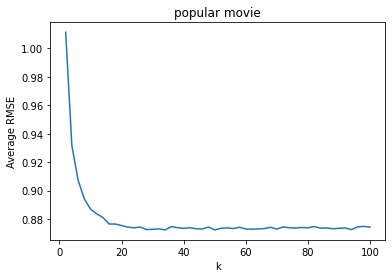

In [ ]:
plt.plot(K_range,rmse_pop)
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('popular movie')


In [ ]:
for i in range(len(rmse_pop)):
  if abs(rmse_pop[i]-rmse_pop[i+1]) < 0.0001:
    print(f"minimum RMSE is {rmse_pop[i]} at k = {i}")
    best_rmse_pop = i
    break

minimum RMSE is 0.8765720872958328 at k = 7


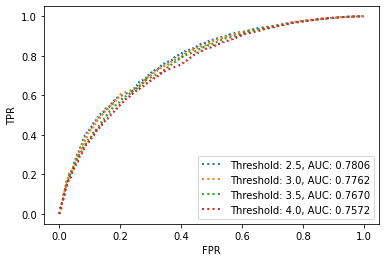

In [ ]:
# ROC Curves
trainset, testset = train_test_split(data, test_size=0.1)
# popular
best_pop = KNNWithMeans(k=best_rmse_pop, sim_options={'name': 'pearson'}, verbose=False).fit(trainset).test(testset)

fig, ax = plt.subplots()
for th in threshold:
  y_true, y_pred = [], []
  for i in range(len(testset)):
    y_pred.append(best_pop[i].est)
    if testset[i][2] >= th:
      y_true.append(1)
    else:
      y_true.append(0)

  fpr, tpr, _ = roc_curve(y_true, y_pred)
  auc_score = roc_auc_score(y_true, y_pred)
  ax.plot(fpr, tpr, label = 'Threshold: %.1f, AUC: %.4f' %(th,auc_score), linewidth=2,linestyle=':')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show() 

#### Unpopular movie

In [ ]:
# sweep 
# for unpopular movie testset  
rmse_unpop=[]
for k in K_range:
  print(f"k = {k}")
  rmse_knn = []
  rmse = 0
  for trainset, testset in K_fold.split(data):
      Unpop_mov = []
      for i in testset:
        if len(rate_dict[i[1]]) <= 2:
          Unpop_mov.append(i)
      pred = KNNWithMeans(k=k,sim_options={'name':'pearson'}).fit(trainset).test(Unpop_mov)
      rmse_knn.append(accuracy.rmse(pred))
  rmse_unpop.append(np.mean(rmse_knn))

k = 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1546
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0964
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1375
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1388
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1657
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0573
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1507
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0908
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1178
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0440
k = 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.153

Text(0.5, 1.0, 'unpopular movie')

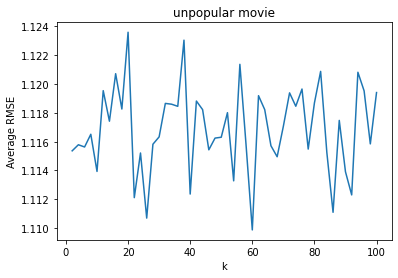

In [ ]:
plt.plot(K_range,rmse_unpop)
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('unpopular movie')

In [ ]:
print(f"minimum RMSE is {np.min(rmse_unpop)} at k = {np.argmin(rmse_unpop)}")
best_rmse_unpop = np.argmin(rmse_unpop)


minimum RMSE is 1.1098758642688018 at k = 29


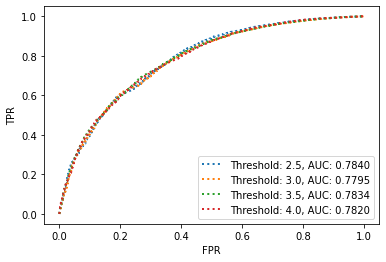

In [ ]:
# ROC Curves
trainset, testset = train_test_split(data, test_size=0.1)
# unpop
# min is too small, so 
best_unpop = KNNWithMeans(k=best_rmse_unpop, sim_options={'name': 'pearson'}, verbose=False).fit(trainset).test(testset)

fig, ax = plt.subplots()
for th in threshold:
  y_true, y_pred = [], []
  for i in range(len(testset)):
    y_pred.append(best_unpop[i].est)
    if testset[i][2] >= th:
      y_true.append(1)
    else:
      y_true.append(0)

  fpr, tpr, _ = roc_curve(y_true, y_pred)
  auc_score = roc_auc_score(y_true, y_pred)
  ax.plot(fpr, tpr, label = 'Threshold: %.1f, AUC: %.4f' %(th,auc_score), linewidth=2,linestyle=':')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show() 

#### High variance movies

In [ ]:
# sweep 
# for high variance movie testset  
# high variance movies
data_p_table = ratings.pivot_table('rating', 'userId', 'movieId')
variance = np.var(data_p_table, axis=0)


rmse_high_var=[]
for k in K_range:
  print(f"k = {k}")
  rmse_knn = []
  rmse = 0
  for trainset, testset in K_fold.split(data):
      High_var_mov = []
      for i in testset:
        if i[1] in variance[variance>=2].keys() and len(rate_dict[i[1]]) >= 5:
          High_var_mov.append(i)
      pred = KNNWithMeans(k=k,sim_options={'name':'pearson'}).fit(trainset).test(High_var_mov)
      rmse_knn.append(accuracy.rmse(pred))
  rmse_high_var.append(np.mean(rmse_knn))

k = 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.8994
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.8789
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6405
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2675
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2472
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3007
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3179
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4581
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.8612
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3642
k = 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.812

Text(0.5, 1.0, 'high variance movie')

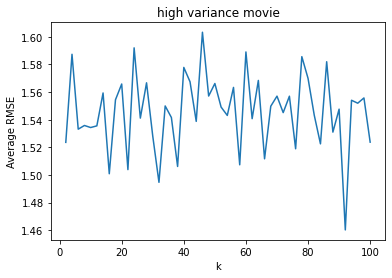

In [ ]:
plt.plot(K_range,rmse_high_var)
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('high variance movie')

In [ ]:

print(f"minimum RMSE is {np.min(rmse_high_var)} at k = {np.argmin(rmse_high_var)}")
best_rmse_high_var = np.argmin(rmse_high_var)

minimum RMSE is 1.4601444785804032 at k = 45


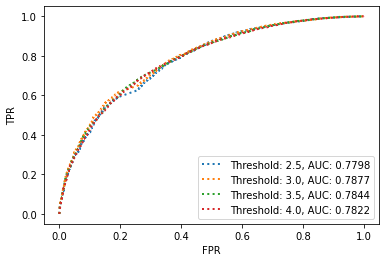

In [ ]:
# ROC Curves
trainset, testset = train_test_split(data, test_size=0.1)
# high variance
best_high_var = KNNWithMeans(k=90, sim_options={'name': 'pearson'}, verbose=False).fit(trainset).test(testset)

fig, ax = plt.subplots()
for th in threshold:
  y_true, y_pred = [], []
  for i in range(len(testset)):
    y_pred.append(best_high_var[i].est)
    if testset[i][2] >= th:
      y_true.append(1)
    else:
      y_true.append(0)

  fpr, tpr, _ = roc_curve(y_true, y_pred)
  auc_score = roc_auc_score(y_true, y_pred)
  ax.plot(fpr, tpr, label = 'Threshold: %.1f, AUC: %.4f' %(th,auc_score), linewidth=2,linestyle=':')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show() 

## Q8

In [ ]:
from surprise import NMF
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader=reader)

#### Q8A

In [ ]:
rmse_nmf = []
mae_nmf = []
k = np.arange(2,52,2)
for index in k:
  print(f"k = {index}")
  nmf = NMF(n_factors = index)
  perform = cross_validate(nmf, data, measures=['rmse', 'mae'], cv=10, verbose=False)
  rmse_nmf.append(np.mean(perform['test_rmse']))
  mae_nmf.append(np.mean(perform['test_mae']))

k = 2
k = 4
k = 6
k = 8
k = 10
k = 12
k = 14
k = 16
k = 18
k = 20
k = 22
k = 24
k = 26
k = 28
k = 30
k = 32
k = 34
k = 36
k = 38
k = 40
k = 42
k = 44
k = 46
k = 48
k = 50


Text(0, 0.5, 'Error')

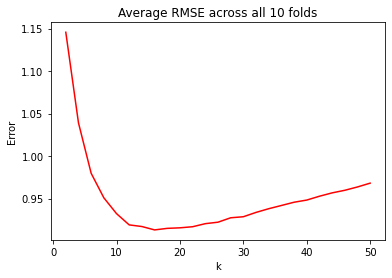

In [ ]:
plt.plot(k,rmse_nmf, 'r', label='RMSE')
plt.title("Average RMSE across all 10 folds")
plt.xlabel("k"); 
plt.ylabel("Error")

Text(0, 0.5, 'Error')

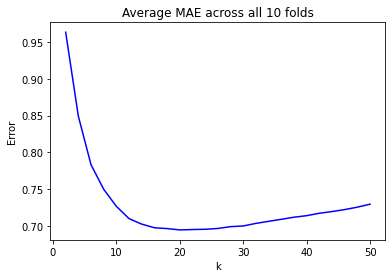

In [ ]:
plt.plot(k,mae_nmf, 'b', label='MSE')
plt.title("Average MAE across all 10 folds")
plt.xlabel("k"); 
plt.ylabel("Error")

#### Q8B

In [ ]:
# we define if the rmse or mse change between two k is smaller than 0.00005, 
# we say it is a steady state value
for i in range(len(rmse_nmf)):
  if abs(rmse_nmf[i]-rmse_nmf[i+1]) < 0.005:
    print(f"minimum RMSE is {rmse_nmf[i]} at k = {i}")
    break

for j in range(len(mae_nmf)):
  if abs(mae_nmf[j]-mae_nmf[j+1]) < 0.005:
    print(f"minimum MAE is {mae_nmf[j]} at k = {j}")  
    break

minimum RMSE is 0.9190495465477053 at k = 5
minimum MAE is 0.7026259864301886 at k = 6


#### Q8C

#### popular music

In [ ]:
K_fold = KFold(n_splits=10)
K_range = np.arange(2,52,2)
threshold = [2.5, 3.0, 3.5, 4.0]

In [ ]:
# sweep 
# for popular movie testset  
rmse_pop=[]
for k in K_range:
  print(f"k = {k}")
  rmse_NMF = []
  rmse = 0
  for trainset, testset in K_fold.split(data):
      Pop_mov = []
      for i in testset:
        if len(rate_dict[i[1]]) > 2:
          Pop_mov.append(i)
        
      pred = NMF(n_factors=k,verbose=False).fit(trainset).test(Pop_mov)
      rmse_NMF.append(accuracy.rmse(pred))
  rmse_pop.append(np.mean(rmse_NMF))

k = 2
RMSE: 1.1380
RMSE: 1.1429
RMSE: 1.1306
RMSE: 1.1344
RMSE: 1.1462
RMSE: 1.1412
RMSE: 1.1362
RMSE: 1.1545
RMSE: 1.1338
RMSE: 1.1397
k = 4
RMSE: 1.0065
RMSE: 1.0459
RMSE: 1.0233
RMSE: 1.0227
RMSE: 1.0347
RMSE: 1.0167
RMSE: 1.0325
RMSE: 1.0256
RMSE: 1.0325
RMSE: 1.0239
k = 6
RMSE: 0.9682
RMSE: 0.9658
RMSE: 0.9527
RMSE: 0.9732
RMSE: 0.9774
RMSE: 0.9739
RMSE: 0.9649
RMSE: 0.9636
RMSE: 0.9624
RMSE: 0.9606
k = 8
RMSE: 0.9281
RMSE: 0.9349
RMSE: 0.9395
RMSE: 0.9268
RMSE: 0.9291
RMSE: 0.9286
RMSE: 0.9446
RMSE: 0.9294
RMSE: 0.9250
RMSE: 0.9274
k = 10
RMSE: 0.9038
RMSE: 0.9208
RMSE: 0.9134
RMSE: 0.8954
RMSE: 0.9072
RMSE: 0.9147
RMSE: 0.9205
RMSE: 0.9032
RMSE: 0.9121
RMSE: 0.9006
k = 12
RMSE: 0.9069
RMSE: 0.9031
RMSE: 0.9069
RMSE: 0.8934
RMSE: 0.9152
RMSE: 0.8934
RMSE: 0.9050
RMSE: 0.8973
RMSE: 0.8851
RMSE: 0.9129
k = 14
RMSE: 0.9083
RMSE: 0.8845
RMSE: 0.8917
RMSE: 0.9017
RMSE: 0.8935
RMSE: 0.8875
RMSE: 0.8957
RMSE: 0.8845
RMSE: 0.9103
RMSE: 0.9031
k = 16
RMSE: 0.9038
RMSE: 0.8802
RMSE: 0.8910

Text(0.5, 1.0, 'popular movie of NMF')

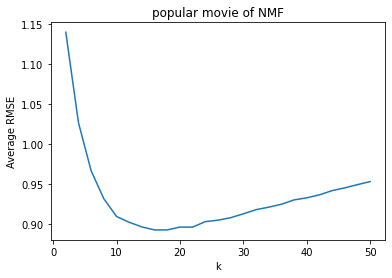

In [ ]:
plt.plot(K_range,rmse_pop)
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('popular movie of NMF')


In [ ]:
for i in range(len(rmse_pop)):
  if abs(rmse_pop[i]-rmse_pop[i+1]) < 0.0001:
    print(f"minimum RMSE is {rmse_pop[i]} at k = {i}")
    best_rmse_pop = i
    break

minimum RMSE is 0.8923451221816642 at k = 7


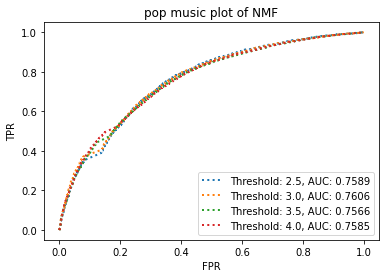

In [ ]:
# ROC Curves
trainset, testset = train_test_split(data, test_size=0.1)
# popular
best_pop =  NMF(n_factors = best_rmse_pop).fit(trainset).test(testset)

fig, ax = plt.subplots()
for th in threshold:
  y_true, y_pred = [], []
  for i in range(len(testset)):
    y_pred.append(best_pop[i].est)
    if testset[i][2] >= th:
      y_true.append(1)
    else:
      y_true.append(0)

  fpr, tpr, _ = roc_curve(y_true, y_pred)
  auc_score = roc_auc_score(y_true, y_pred)
  ax.plot(fpr, tpr, label = 'Threshold: %.1f, AUC: %.4f' %(th,auc_score), linewidth=2,linestyle=':')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('pop music plot of NMF')
plt.show() 

#### Unpop

In [ ]:
# sweep 
# for unpopular movie testset  
rmse_unpop=[]
for k in K_range:
  print(f"k = {k}")
  rmse_NMF = []
  rmse = 0
  for trainset, testset in K_fold.split(data):
      Unpop_mov = []
      for i in testset:
        if len(rate_dict[i[1]]) <= 2:
          Unpop_mov.append(i)
      pred = NMF(n_factors=k,verbose=False).fit(trainset).test(Unpop_mov)
      rmse_NMF.append(accuracy.rmse(pred))
  rmse_unpop.append(np.mean(rmse_NMF))

k = 2
RMSE: 1.1998
RMSE: 1.2743
RMSE: 1.2303
RMSE: 1.2784
RMSE: 1.2529
RMSE: 1.2458
RMSE: 1.1964
RMSE: 1.1985
RMSE: 1.1893
RMSE: 1.2832
k = 4
RMSE: 1.2207
RMSE: 1.2148
RMSE: 1.2856
RMSE: 1.2804
RMSE: 1.1878
RMSE: 1.1742
RMSE: 1.2055
RMSE: 1.2638
RMSE: 1.2331
RMSE: 1.2066
k = 6
RMSE: 1.2210
RMSE: 1.1741
RMSE: 1.1986
RMSE: 1.2010
RMSE: 1.1695
RMSE: 1.2577
RMSE: 1.2344
RMSE: 1.2392
RMSE: 1.2336
RMSE: 1.2104
k = 8
RMSE: 1.1631
RMSE: 1.1613
RMSE: 1.3119
RMSE: 1.1722
RMSE: 1.2093
RMSE: 1.2339
RMSE: 1.1977
RMSE: 1.2118
RMSE: 1.2599
RMSE: 1.2238
k = 10
RMSE: 1.2440
RMSE: 1.1406
RMSE: 1.1893
RMSE: 1.2031
RMSE: 1.2449
RMSE: 1.1989
RMSE: 1.1772
RMSE: 1.1947
RMSE: 1.1888
RMSE: 1.2035
k = 12
RMSE: 1.2034
RMSE: 1.1678
RMSE: 1.2047
RMSE: 1.1608
RMSE: 1.2237
RMSE: 1.1615
RMSE: 1.1850
RMSE: 1.2493
RMSE: 1.2283
RMSE: 1.2284
k = 14
RMSE: 1.2287
RMSE: 1.2644
RMSE: 1.2334
RMSE: 1.2468
RMSE: 1.1971
RMSE: 1.1984
RMSE: 1.1524
RMSE: 1.0953
RMSE: 1.1682
RMSE: 1.1731
k = 16
RMSE: 1.1988
RMSE: 1.1791
RMSE: 1.2193

Text(0.5, 1.0, 'unpopular movie of NMF')

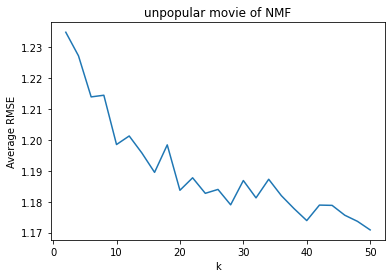

In [ ]:
plt.plot(K_range,rmse_unpop)
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('unpopular movie of NMF')

In [ ]:
print(f"minimum RMSE is {np.min(rmse_unpop)} at k = {np.argmin(rmse_unpop)}")
best_rmse_unpop = np.argmin(rmse_unpop)


minimum RMSE is 1.1708630036393113 at k = 24


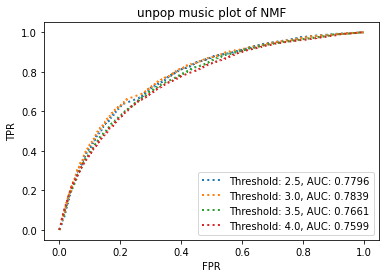

In [ ]:
# ROC Curves
trainset, testset = train_test_split(data, test_size=0.1)
# upop
best_unpop =  NMF(n_factors = best_rmse_unpop).fit(trainset).test(testset)

fig, ax = plt.subplots()
for th in threshold:
  y_true, y_pred = [], []
  for i in range(len(testset)):
    y_pred.append(best_unpop[i].est)
    if testset[i][2] >= th:
      y_true.append(1)
    else:
      y_true.append(0)

  fpr, tpr, _ = roc_curve(y_true, y_pred)
  auc_score = roc_auc_score(y_true, y_pred)
  ax.plot(fpr, tpr, label = 'Threshold: %.1f, AUC: %.4f' %(th,auc_score), linewidth=2,linestyle=':')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('unpop music plot of NMF')
plt.show() 

#### High variance music

In [ ]:
# sweep 
# for high variance movie testset  
# high variance movies
data_p_table = ratings.pivot_table('rating', 'userId', 'movieId')
variance = np.var(data_p_table, axis=0)


rmse_high_var=[]
for k in K_range:
  print(f"k = {k}")
  rmse_NMF = []
  rmse = 0
  for trainset, testset in K_fold.split(data):
      High_var_mov = []
      for i in testset:
        if i[1] in variance[variance>=2].keys() and len(rate_dict[i[1]]) >= 5:
          High_var_mov.append(i)
      pred = NMF(n_factors=k,verbose=False).fit(trainset).test(High_var_mov)
      rmse_NMF.append(accuracy.rmse(pred))
  rmse_high_var.append(np.mean(rmse_NMF))

k = 2
RMSE: 1.5735
RMSE: 1.9236
RMSE: 1.8504
RMSE: 1.7427
RMSE: 1.9128
RMSE: 1.5677
RMSE: 1.8904
RMSE: 1.6680
RMSE: 1.1432
RMSE: 1.8328
k = 4
RMSE: 1.7797
RMSE: 1.7422
RMSE: 1.8595
RMSE: 1.5644
RMSE: 1.6335
RMSE: 1.7146
RMSE: 1.7009
RMSE: 1.8778
RMSE: 1.8568
RMSE: 1.9363
k = 6
RMSE: 1.7478
RMSE: 1.7917
RMSE: 1.4459
RMSE: 1.7836
RMSE: 1.9212
RMSE: 1.5227
RMSE: 1.6335
RMSE: 1.6829
RMSE: 1.5802
RMSE: 1.7440
k = 8
RMSE: 1.8837
RMSE: 1.2979
RMSE: 1.8077
RMSE: 1.5956
RMSE: 2.1321
RMSE: 1.3819
RMSE: 1.4932
RMSE: 1.6566
RMSE: 1.5939
RMSE: 1.4985
k = 10
RMSE: 1.6506
RMSE: 1.8615
RMSE: 1.8214
RMSE: 2.0624
RMSE: 1.7195
RMSE: 1.8007
RMSE: 1.6363
RMSE: 1.7635
RMSE: 1.5495
RMSE: 1.8107
k = 12
RMSE: 1.6352
RMSE: 1.7710
RMSE: 1.7308
RMSE: 1.7307
RMSE: 1.3199
RMSE: 1.8132
RMSE: 1.5394
RMSE: 1.6853
RMSE: 1.7252
RMSE: 1.8293
k = 14
RMSE: 1.7377
RMSE: 1.4319
RMSE: 1.5836
RMSE: 1.4903
RMSE: 1.2931
RMSE: 1.5265
RMSE: 1.8466
RMSE: 1.6636
RMSE: 1.6445
RMSE: 1.6734
k = 16
RMSE: 1.7958
RMSE: 1.8083
RMSE: 1.8092

Text(0.5, 1.0, 'high variance movie of nmf')

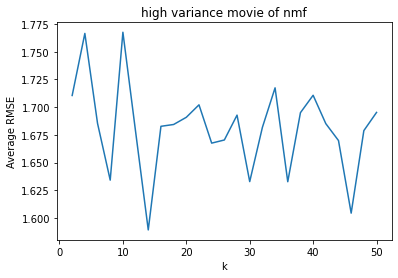

In [ ]:
plt.plot(K_range,rmse_high_var)
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('high variance movie of nmf')

In [ ]:
print(f"minimum RMSE is {np.min(rmse_high_var)} at k = {np.argmin(rmse_high_var)}")
best_rmse_high_var = np.argmin(rmse_high_var)

minimum RMSE is 1.5891303822721412 at k = 6


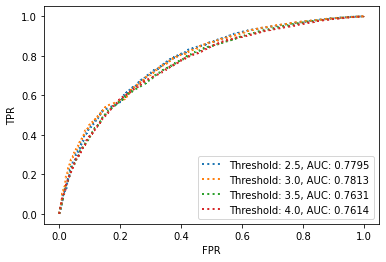

In [ ]:
# ROC Curves
trainset, testset = train_test_split(data, test_size=0.1)
# high variance
best_high_var =  NMF(n_factors = 14).fit(trainset).test(testset)

fig, ax = plt.subplots()
for th in threshold:
  y_true, y_pred = [], []
  for i in range(len(testset)):
    y_pred.append(best_high_var[i].est)
    if testset[i][2] >= th:
      y_true.append(1)
    else:
      y_true.append(0)

  fpr, tpr, _ = roc_curve(y_true, y_pred)
  auc_score = roc_auc_score(y_true, y_pred)
  ax.plot(fpr, tpr, label = 'Threshold: %.1f, AUC: %.4f' %(th,auc_score), linewidth=2,linestyle=':')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show() 

## Q9

In [ ]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader=reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=.1)
k = 20
nmf = NMF(n_factors=k)
nmf.fit(trainset).test(testset)


[Prediction(uid=420, iid=296, r_ui=4.0, est=4.115096845307662, details={'was_impossible': False}),
 Prediction(uid=561, iid=58559, r_ui=5.0, est=4.137554873318237, details={'was_impossible': False}),
 Prediction(uid=210, iid=79091, r_ui=4.0, est=4.5202605330321095, details={'was_impossible': False}),
 Prediction(uid=252, iid=134853, r_ui=5.0, est=4.383629541961605, details={'was_impossible': False}),
 Prediction(uid=450, iid=3948, r_ui=4.0, est=4.023914159008667, details={'was_impossible': False}),
 Prediction(uid=232, iid=79224, r_ui=3.5, est=2.2364668503071456, details={'was_impossible': False}),
 Prediction(uid=305, iid=185585, r_ui=2.5, est=3.1935504296142465, details={'was_impossible': False}),
 Prediction(uid=19, iid=427, r_ui=3.0, est=2.9804102570551594, details={'was_impossible': False}),
 Prediction(uid=323, iid=1094, r_ui=4.0, est=2.8297926298981753, details={'was_impossible': False}),
 Prediction(uid=456, iid=141, r_ui=4.0, est=3.9481524415661977, details={'was_impossible': 

In [ ]:
# user-latent factors
U = nmf.pu
# movie-latent factors
V = nmf.qi

In [ ]:
movies = pd.read_csv('movies.csv',names=['movieid','title','genres'],header=0)
for col in range(20):
  print("-"*30)
  print(f"column {col}")
  V_col = V[:,col]
  V_col_sorted = np.argsort(V_col,axis = 0)[::-1]
  V_col_sorted_10 = V_col_sorted[:10]
  print(f"the top 10 genres is:")
  for idx in V_col_sorted_10:
    genres = movies['genres'][idx]
    
    print(genres)

------------------------------
column 0
the top 10 genres is:
Horror|Thriller
Action|Crime|Drama
Comedy|Drama|Romance
Drama|Romance
Action|Drama
Adventure|Children
Documentary
Adventure|Animation|Children|Comedy|Fantasy
Documentary
Drama|Mystery
------------------------------
column 1
the top 10 genres is:
Drama|Western
Comedy|Crime
Crime|Drama|Mystery|Thriller
Comedy
Drama|Mystery|Romance|Thriller
Action|Comedy|Crime
Drama
Musical
Comedy|Crime|Drama|Romance
Action|Crime|Horror|Sci-Fi|Thriller
------------------------------
column 2
the top 10 genres is:
Comedy|Crime
Comedy|Romance
Comedy|Drama
Comedy|Crime|Drama|Thriller
Action|Crime|Drama|Thriller
Drama
Comedy
Drama|Romance
Crime|Mystery|Thriller
Drama|Romance|War
------------------------------
column 3
the top 10 genres is:
Crime|Horror|Thriller
Drama
Action|Comedy|Crime|Drama
Documentary
Comedy|Drama
Comedy|Drama
Drama|Musical
Drama
Drama
Action|Drama|Sci-Fi|Thriller
------------------------------
column 4
the top 10 genres is:
Com

## Q10

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import SVD
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader=reader)


#### Q10A

In [ ]:
rmse_mf = []
mae_mf = []
k = np.arange(2,52,2)
for index in k:
  print(f"k = {index}")
  mf = SVD(n_factors = index)
  perform = cross_validate(mf, data, measures=['rmse', 'mae'], cv=10, verbose=False)
  rmse_mf.append(np.mean(perform['test_rmse']))
  mae_mf.append(np.mean(perform['test_mae']))

k = 2
k = 4
k = 6
k = 8
k = 10
k = 12
k = 14
k = 16
k = 18
k = 20
k = 22
k = 24
k = 26
k = 28
k = 30
k = 32
k = 34
k = 36
k = 38
k = 40
k = 42
k = 44
k = 46
k = 48
k = 50


Text(0, 0.5, 'Error')

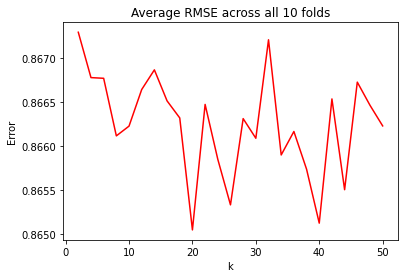

In [ ]:
plt.plot(k,rmse_mf, 'r', label='RMSE')
plt.title("Average RMSE across all 10 folds")
plt.xlabel("k"); 
plt.ylabel("Error")

Text(0, 0.5, 'Error')

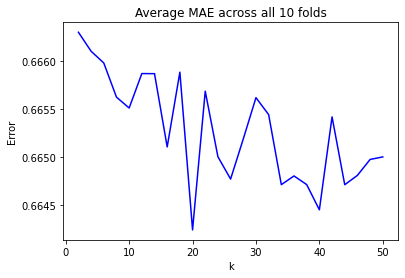

In [ ]:
plt.plot(k,mae_mf, 'b', label='MSE')
plt.title("Average MAE across all 10 folds")
plt.xlabel("k"); 
plt.ylabel("Error")

#### Q10B

In [ ]:
min_rmse = np.min(rmse_mf)
print(f'Min RMSE = {min_rmse} at k = {np.argmin(rmse_mf)}')

min_mae = np.min(mae_mf)
print(f'Min MAE = {min_mae} at k = {np.argmin(mae_mf)}')


Min RMSE = 0.8650450084118061 at k = 9
Min MAE = 0.6642399607686121 at k = 9


#### Q10C

In [ ]:
K_fold = KFold(n_splits=10)
K_range = np.arange(2,52,2)
threshold = [2.5, 3.0, 3.5, 4.0]

In [ ]:
# sweep 
# for popular movie testset  
rmse_pop_mf=[]
for k in K_range:
  print(f"k = {k}")
  rmse_SVD = []
  rmse = 0
  for trainset, testset in K_fold.split(data):
      Pop_mov = []
      for i in testset:
        if len(rate_dict[i[1]]) > 2:
          Pop_mov.append(i)
        
      pred = SVD(n_factors=k,verbose=False).fit(trainset).test(Pop_mov)
      rmse_SVD.append(accuracy.rmse(pred))
  rmse_pop_mf.append(np.mean(rmse_SVD))

k = 2
RMSE: 0.8536
RMSE: 0.8587
RMSE: 0.8640
RMSE: 0.8589
RMSE: 0.8633
RMSE: 0.8525
RMSE: 0.8627
RMSE: 0.8631
RMSE: 0.8590
RMSE: 0.8604
k = 4
RMSE: 0.8460
RMSE: 0.8664
RMSE: 0.8535
RMSE: 0.8672
RMSE: 0.8664
RMSE: 0.8505
RMSE: 0.8551
RMSE: 0.8686
RMSE: 0.8598
RMSE: 0.8625
k = 6
RMSE: 0.8756
RMSE: 0.8624
RMSE: 0.8539
RMSE: 0.8689
RMSE: 0.8672
RMSE: 0.8492
RMSE: 0.8535
RMSE: 0.8500
RMSE: 0.8577
RMSE: 0.8521
k = 8
RMSE: 0.8532
RMSE: 0.8702
RMSE: 0.8439
RMSE: 0.8629
RMSE: 0.8588
RMSE: 0.8564
RMSE: 0.8515
RMSE: 0.8638
RMSE: 0.8645
RMSE: 0.8587
k = 10
RMSE: 0.8491
RMSE: 0.8570
RMSE: 0.8559
RMSE: 0.8532
RMSE: 0.8693
RMSE: 0.8601
RMSE: 0.8491
RMSE: 0.8636
RMSE: 0.8589
RMSE: 0.8684
k = 12
RMSE: 0.8541
RMSE: 0.8611
RMSE: 0.8661
RMSE: 0.8608
RMSE: 0.8424
RMSE: 0.8495
RMSE: 0.8611
RMSE: 0.8640
RMSE: 0.8563
RMSE: 0.8658
k = 14
RMSE: 0.8477
RMSE: 0.8688
RMSE: 0.8564
RMSE: 0.8587
RMSE: 0.8538
RMSE: 0.8729
RMSE: 0.8614
RMSE: 0.8505
RMSE: 0.8614
RMSE: 0.8561
k = 16
RMSE: 0.8799
RMSE: 0.8531
RMSE: 0.8551

Text(0.5, 1.0, 'popular movie of NMF')

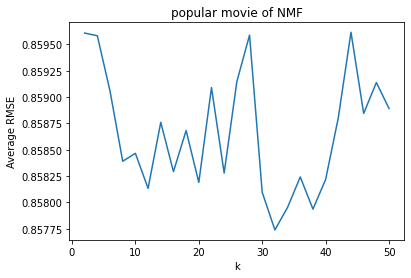

In [ ]:
plt.plot(K_range,rmse_pop_mf)
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('popular movie of NMF')


In [ ]:
print(f"minimum RMSE is {np.min(rmse_pop_mf)} at k = {np.argmin(rmse_pop_mf)}")
best_rmse_pop_mf = np.argmin(rmse_pop_mf)

minimum RMSE is 0.8577380731317094 at k = 15


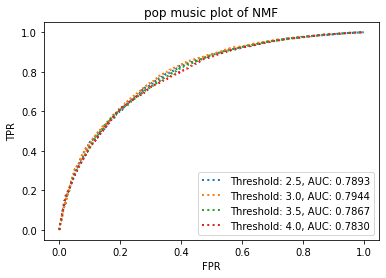

In [ ]:
# ROC Curves
trainset, testset = train_test_split(data, test_size=0.1)
# popular
best_pop =  SVD(n_factors = best_rmse_pop_mf).fit(trainset).test(testset)

fig, ax = plt.subplots()
for th in threshold:
  y_true, y_pred = [], []
  for i in range(len(testset)):
    y_pred.append(best_pop[i].est)
    if testset[i][2] >= th:
      y_true.append(1)
    else:
      y_true.append(0)

  fpr, tpr, _ = roc_curve(y_true, y_pred)
  auc_score = roc_auc_score(y_true, y_pred)
  ax.plot(fpr, tpr, label = 'Threshold: %.1f, AUC: %.4f' %(th,auc_score), linewidth=2,linestyle=':')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('pop music plot of NMF')
plt.show() 

#### unpopular movie

In [ ]:
# sweep 
# for unpopular movie testset  
rmse_unpop_mf=[]
for k in K_range:
  print(f"k = {k}")
  rmse_SVD = []
  rmse = 0
  for trainset, testset in K_fold.split(data):
      Unpop_mov = []
      for i in testset:
        if len(rate_dict[i[1]]) <= 2:
          Unpop_mov.append(i)
      pred = SVD(n_factors=k,verbose=False).fit(trainset).test(Unpop_mov)
      rmse_SVD.append(accuracy.rmse(pred))
  rmse_unpop_mf.append(np.mean(rmse_SVD))

k = 2
RMSE: 1.0144
RMSE: 1.0078
RMSE: 0.9999
RMSE: 0.9002
RMSE: 1.0124
RMSE: 0.9345
RMSE: 0.9180
RMSE: 0.9678
RMSE: 0.9562
RMSE: 1.0325
k = 4
RMSE: 0.9517
RMSE: 1.0010
RMSE: 0.9499
RMSE: 0.9799
RMSE: 0.9647
RMSE: 0.9870
RMSE: 0.9861
RMSE: 1.0034
RMSE: 0.9829
RMSE: 0.9408
k = 6
RMSE: 0.9955
RMSE: 0.9326
RMSE: 0.9827
RMSE: 0.9972
RMSE: 0.9460
RMSE: 0.9817
RMSE: 0.9871
RMSE: 0.9737
RMSE: 0.9664
RMSE: 0.9855
k = 8
RMSE: 1.0395
RMSE: 0.9551
RMSE: 0.9853
RMSE: 0.9541
RMSE: 0.9793
RMSE: 0.9971
RMSE: 0.9679
RMSE: 0.9570
RMSE: 0.9568
RMSE: 0.9577
k = 10
RMSE: 1.0005
RMSE: 0.9593
RMSE: 0.9906
RMSE: 0.9778
RMSE: 1.0156
RMSE: 0.9291
RMSE: 0.9432
RMSE: 0.9412
RMSE: 1.0325
RMSE: 0.9700
k = 12
RMSE: 0.9952
RMSE: 0.9607
RMSE: 0.9029
RMSE: 0.9616
RMSE: 0.9856
RMSE: 0.9585
RMSE: 1.0199
RMSE: 0.9879
RMSE: 0.9741
RMSE: 1.0100
k = 14
RMSE: 0.9902
RMSE: 0.9490
RMSE: 0.9300
RMSE: 0.9400
RMSE: 1.0327
RMSE: 0.9977
RMSE: 0.9944
RMSE: 0.9634
RMSE: 0.9652
RMSE: 1.0156
k = 16
RMSE: 0.9480
RMSE: 0.9407
RMSE: 0.9727

Text(0.5, 1.0, 'unpopular movie of NMF')

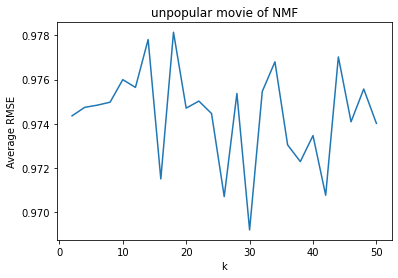

In [ ]:
plt.plot(K_range,rmse_unpop_mf)
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('unpopular movie of NMF')

In [ ]:
print(f"minimum RMSE is {np.min(rmse_unpop_mf)} at k = {np.argmin(rmse_unpop_mf)}")
best_rmse_unpop_mf = np.argmin(rmse_unpop_mf)


minimum RMSE is 0.9692069593281623 at k = 14


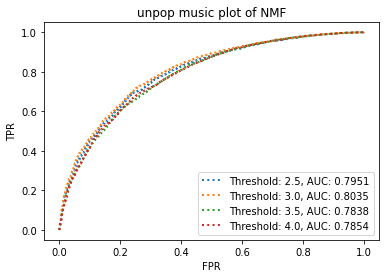

In [ ]:
from surprise.prediction_algorithms import SVDpp
# ROC Curves
trainset, testset = train_test_split(data, test_size=0.1)
# upop
best_unpop =  SVD(n_factors = best_rmse_unpop_mf).fit(trainset).test(testset)

fig, ax = plt.subplots()
for th in threshold:
  y_true, y_pred = [], []
  for i in range(len(testset)):
    y_pred.append(best_unpop[i].est)
    if testset[i][2] >= th:
      y_true.append(1)
    else:
      y_true.append(0)

  fpr, tpr, _ = roc_curve(y_true, y_pred)
  auc_score = roc_auc_score(y_true, y_pred)
  ax.plot(fpr, tpr, label = 'Threshold: %.1f, AUC: %.4f' %(th,auc_score), linewidth=2,linestyle=':')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('unpop music plot of NMF')
plt.show() 

#### High variance music

In [ ]:
# sweep 
# for high variance movie testset  
# high variance movies
data_p_table = ratings.pivot_table('rating', 'userId', 'movieId')
variance = np.var(data_p_table, axis=0)


rmse_high_var_mf=[]
for k in K_range:
  print(f"k = {k}")
  rmse_SVD = []
  rmse = 0
  for trainset, testset in K_fold.split(data):
      High_var_mov = []
      for i in testset:
        if i[1] in variance[variance>=2].keys() and len(rate_dict[i[1]]) >= 5:
          High_var_mov.append(i)
      pred = SVD(n_factors=k,verbose=False).fit(trainset).test(High_var_mov)
      rmse_SVD.append(accuracy.rmse(pred))
  rmse_high_var_mf.append(np.mean(rmse_SVD))

k = 2
RMSE: 1.0596
RMSE: 1.6863
RMSE: 1.3369
RMSE: 1.3162
RMSE: 1.5757
RMSE: 1.2806
RMSE: 1.6945
RMSE: 1.7797
RMSE: 1.6274
RMSE: 1.4905
k = 4
RMSE: 1.5201
RMSE: 1.1453
RMSE: 1.3777
RMSE: 1.2829
RMSE: 1.6998
RMSE: 1.2137
RMSE: 1.2597
RMSE: 1.8871
RMSE: 1.8669
RMSE: 1.7166
k = 6
RMSE: 1.3937
RMSE: 1.6180
RMSE: 1.2909
RMSE: 1.5308
RMSE: 1.5976
RMSE: 1.3937
RMSE: 1.3104
RMSE: 1.7006
RMSE: 1.5524
RMSE: 1.4249
k = 8
RMSE: 1.3787
RMSE: 1.3601
RMSE: 1.5063
RMSE: 1.4615
RMSE: 1.3437
RMSE: 1.1794
RMSE: 1.7924
RMSE: 1.4467
RMSE: 1.6669
RMSE: 1.4726
k = 10
RMSE: 1.4191
RMSE: 1.1360
RMSE: 1.6387
RMSE: 1.4389
RMSE: 1.3305
RMSE: 1.4274
RMSE: 1.6878
RMSE: 1.2415
RMSE: 1.6092
RMSE: 1.6650
k = 12
RMSE: 1.7912
RMSE: 1.6841
RMSE: 1.5275
RMSE: 1.4017
RMSE: 1.5783
RMSE: 1.2770
RMSE: 1.5395
RMSE: 1.4747
RMSE: 1.2162
RMSE: 1.2509
k = 14
RMSE: 1.3549
RMSE: 1.7290
RMSE: 1.3749
RMSE: 1.6029
RMSE: 1.2133
RMSE: 1.3423
RMSE: 1.3357
RMSE: 1.5312
RMSE: 1.5506
RMSE: 1.6477
k = 16
RMSE: 1.5181
RMSE: 1.5010
RMSE: 1.1515

Text(0.5, 1.0, 'high variance movie of nmf')

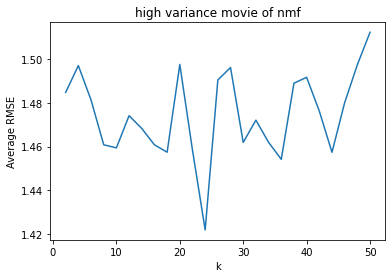

In [ ]:
plt.plot(K_range,rmse_high_var_mf)
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('high variance movie of nmf')

In [ ]:
print(f"minimum RMSE is {np.min(rmse_high_var_mf)} at k = {np.argmin(rmse_high_var_mf)}")
best_rmse_high_var_mf = np.argmin(rmse_high_var_mf)

minimum RMSE is 1.421981547340088 at k = 11


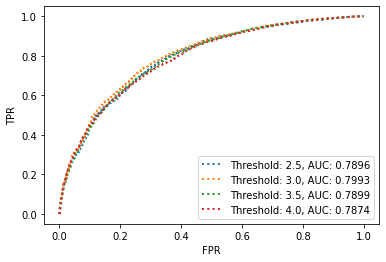

In [ ]:
# ROC Curves
trainset, testset = train_test_split(data, test_size=0.1)
# high variance
best_high_var =  SVD(n_factors = 23 ).fit(trainset).test(testset)

fig, ax = plt.subplots()
for th in threshold:
  y_true, y_pred = [], []
  for i in range(len(testset)):
    y_pred.append(best_high_var[i].est)
    if testset[i][2] >= th:
      y_true.append(1)
    else:
      y_true.append(0)

  fpr, tpr, _ = roc_curve(y_true, y_pred)
  auc_score = roc_auc_score(y_true, y_pred)
  ax.plot(fpr, tpr, label = 'Threshold: %.1f, AUC: %.4f' %(th,auc_score), linewidth=2,linestyle=':')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show() 

## Q11

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
user_ratings = {}
for rows in data.raw_ratings:
  id = rows[0]
  rate = rows[2]
  if id not in user_ratings:
    user_ratings[id] = [rate]
  else:
    user_ratings[id].append(rate)

mean_ratings = {}
keysList = list(user_ratings.keys())
for key in keysList:
  mean_ratings[key] = np.mean(user_ratings[key])
print(mean_ratings)

{496: 3.413793103448276, 391: 3.715025906735751, 387: 3.2585199610516065, 474: 3.398956356736243, 483: 3.618818681318681, 375: 3.909090909090909, 438: 3.3551181102362206, 534: 3.8048076923076923, 288: 3.1459715639810426, 266: 3.5, 414: 3.391957005189029, 599: 2.6420500403551253, 381: 3.542194092827004, 182: 3.5112589559877176, 301: 3.3201754385964914, 338: 2.9358974358974357, 606: 3.6573991031390136, 76: 3.0840336134453783, 477: 3.736666666666667, 510: 2.9027777777777777, 605: 3.2104072398190047, 290: 4.142322097378277, 465: 4.156521739130435, 346: 3.682926829268293, 280: 3.9005102040816326, 388: 3.6206896551724137, 525: 3.542, 21: 3.260722347629797, 187: 3.7751937984496124, 610: 3.6885560675883258, 150: 3.576923076923077, 480: 3.27511961722488, 520: 3.881720430107527, 341: 3.798076923076923, 230: 2.8597122302158273, 509: 3.21627408993576, 603: 3.5079533404029695, 462: 3.4065934065934065, 6: 3.4936305732484074, 318: 3.755972696245734, 220: 3.963768115942029, 284: 3.715909090909091, 365

In [ ]:
K_fold = KFold(n_splits=10)
rmse_naive = 0
for trainset, testset in K_fold.split(data):
  y_pred = []
  y_true = []
  for item in testset:
    y_true.append(item[2])
    prediction = mean_ratings[item[0]]
    y_pred.append(prediction)
  # calculate the mean square root  
  rmse_naive += mean_squared_error(y_true, y_pred, squared = False)
avg_rmse = (rmse_naive/10)

print(f"Average rmse is {avg_rmse}")

Average rmse is 0.9347094956285348


#### Q11B

In [ ]:
# for popular movie testset  

rmse_NCF_pop = 0
for trainset, testset in K_fold.split(data):
    Pop_mov = []
    for i in testset:
      if len(rate_dict[i[1]]) > 2:
        Pop_mov.append(i)

    y_pred = []
    y_true = []
    for item in Pop_mov:
      y_true.append(item[2])
      prediction = mean_ratings[item[0]]
      y_pred.append(prediction)
    rmse_NCF_pop += mean_squared_error(y_true, y_pred, squared = False) 
avg_rmse_pop = (rmse_NCF_pop/10)
print(f"Average rmse of popular movies is {avg_rmse_pop}")

Average rmse of popular movies is 0.932325456304412


In [ ]:
# for unpopular movie testset  

rmse_NCF_Unpop = 0
for trainset, testset in K_fold.split(data):
    Unpop_mov = []
    for i in testset:
      if len(rate_dict[i[1]]) <= 2:
        Unpop_mov.append(i)

    y_pred = []
    y_true = []
    for item in Unpop_mov:
      y_true.append(item[2])
      prediction = mean_ratings[item[0]]
      y_pred.append(prediction)
    rmse_NCF_Unpop += mean_squared_error(y_true, y_pred, squared = False) 
avg_rmse_Unpop = (rmse_NCF_Unpop/10)
print(f"Average rmse of Unpopular movies is {avg_rmse_Unpop}")

Average rmse of Unpopular movies is 0.9713367829380276


In [ ]:
# for high variance movie testset  
data_p_table = ratings.pivot_table('rating', 'userId', 'movieId')
variance = np.var(data_p_table, axis=0)

rmse_NCF_high_var = 0
for trainset, testset in K_fold.split(data):
    high_var_mov = []
    for i in testset:
      if i[1] in variance[variance>=2].keys() and len(rate_dict[i[1]]) >= 5:
        high_var_mov.append(i)
        
    y_pred = []
    y_true = []
    for item in high_var_mov:
      y_true.append(item[2])
      prediction = mean_ratings[item[0]]
      y_pred.append(prediction)
    rmse_NCF_high_var += mean_squared_error(y_true, y_pred, squared = False) 
avg_rmse_high_var = (rmse_NCF_high_var/10)
print(f"Average rmse of high_variance movies is {avg_rmse_high_var}")

Average rmse of high_variance movies is 1.4390810168622097


## Q12

In [ ]:
threshold = 3.0
trainset, testset = train_test_split(data, test_size=0.1)

In [ ]:
k_knn = 27
knn = KNNWithMeans(k=k_knn,sim_options={'name':'pearson'}).fit(trainset).test(testset)
k_nmf = 18
nmf = NMF(n_factors = k_nmf).fit(trainset).test(testset)
k_mf = 20
mf = SVD(n_factors = k_mf).fit(trainset).test(testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


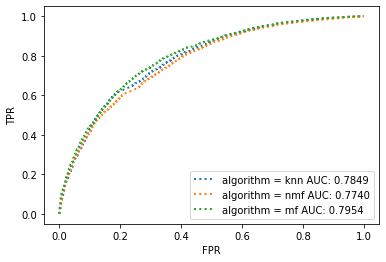

In [ ]:
algo_set = ['knn','nmf','mf']
fig, ax = plt.subplots()
for index in range(3):
  if index == 0:
    algo = knn
  elif index == 1:
    algo = nmf
  else:
    algo = mf

  y_true, y_pred = [], []
  for i in range(len(testset)):
    y_pred.append(algo[i].est)
    if testset[i][2] >= threshold:
      y_true.append(1)
    else:
      y_true.append(0)

  fpr, tpr, _ = roc_curve(y_true, y_pred)
  auc_score = roc_auc_score(y_true, y_pred)
  ax.plot(fpr, tpr, label = f'algorithm = {algo_set[index]} AUC: %.4f' %(auc_score), linewidth=2,linestyle=':')

plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## Q14

In [ ]:
def G_set(testset, t):
  threshold = 3.0  
  valid_rating, num_rating = {},{}
  for id,_,rate in testset:
    # count the number of rating for each movie id
    if id not in num_rating:
      num_rating[id] = 0
    num_rating[id] += 1

    # count the valid rate for each movie id (rate larger than threshold)
    if id not in valid_rating:
      valid_rating[id] = 0
    if rate >= threshold:
      valid_rating[id] += 1

  G = []
  for row in testset:
    id = row[0]
    
    if valid_rating[id] > 0 and num_rating[id] >= t:
      G.append(row)

  return G

def precision_and_recall(pred,t):
  threshold = 3
  pred_dict = {}
  for id,_,rate,est,_ in pred:
    if id not in pred_dict:
      pred_dict[id] = []
    pred_dict[id].append((rate,est))
  
  precisions,recalls = [], []

  for id, ratings in pred_dict.items():
    ratings.sort(key=lambda x: x[1], reverse=True)
    top_t_rating= ratings[:t]

    # calculating precision and recall
    num_G = 0
    num_S = t
    num_S_and_G = 0

    for i in range(len(top_t_rating)):
      if ratings[i][0] >= threshold:
       num_S_and_G += 1

    for r,_ in ratings:
      if r >= threshold:
        num_G += 1

    precisions.append(num_S_and_G/num_S)
    recalls.append(num_S_and_G/num_G)

    precision = np.mean(precisions)
    recall = np.mean(recalls)

  return precision, recall







In [ ]:
t_range = np.arange(1, 26)
k_fold = KFold(n_splits=10)

#### KNN

In [ ]:
prec_knn, rec_knn = [], []
for t in t_range:
  prec,rec = [], []
  k_knn = 27
  for trainset,testset in k_fold.split(data):
    G = G_set(testset,t)
    knn = KNNWithMeans(k=k_knn,sim_options={'name':'pearson'}).fit(trainset).test(G)
    precision, recall = precision_and_recall(knn,t)
    prec.append(precision)
    rec.append(recall)
  precision, recall = np.mean(prec), np.mean(rec)
  prec_knn.append(precision)
  rec_knn.append(recall)


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

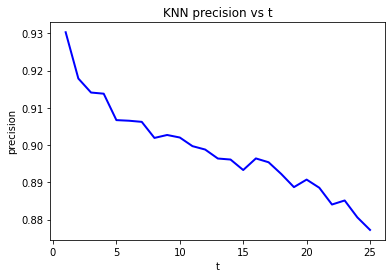

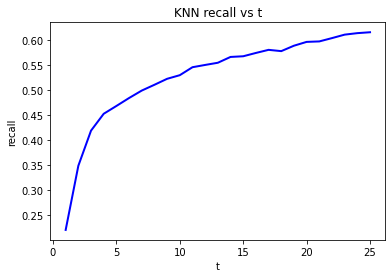

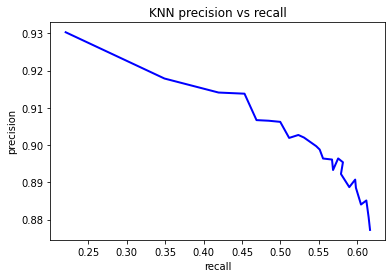

In [ ]:
plt.gcf().clear()
plt.plot(t_range, prec_knn, linewidth=2, color='b')
plt.xlabel('t')
plt.ylabel('precision')
plt.title('KNN precision vs t')
plt.show()

plt.gcf().clear()
plt.plot(t_range, rec_knn, linewidth=2, color='b')
plt.xlabel('t')
plt.ylabel('recall')
plt.title('KNN recall vs t')
plt.show()

plt.gcf().clear()
plt.plot(rec_knn, prec_knn, linewidth=2, color='b')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('KNN precision vs recall')
plt.show()

#### NMF

In [ ]:
prec_nmf, rec_nmf = [], []
for t in t_range:
  print(f't= {t}')
  prec,rec = [], []
  k_nmf = 18
  for trainset,testset in k_fold.split(data):
    G = G_set(testset,t)
    nmf = NMF(n_factors=k_nmf).fit(trainset).test(G)
    precision, recall = precision_and_recall(nmf,t)
    prec.append(precision)
    rec.append(recall)
  precision, recall = np.mean(prec), np.mean(rec)
  prec_nmf.append(precision)
  rec_nmf.append(recall)


t= 1
t= 2
t= 3
t= 4
t= 5
t= 6
t= 7
t= 8
t= 9
t= 10
t= 11
t= 12
t= 13
t= 14
t= 15
t= 16
t= 17
t= 18
t= 19
t= 20
t= 21
t= 22
t= 23
t= 24
t= 25


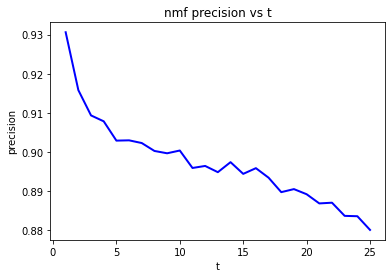

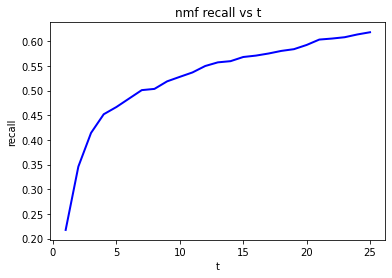

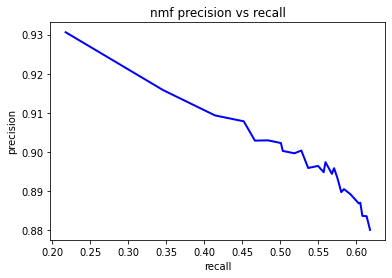

In [ ]:
plt.gcf().clear()
plt.plot(t_range, prec_nmf, linewidth=2, color='b')
plt.xlabel('t')
plt.ylabel('precision')
plt.title('nmf precision vs t')
plt.show()

plt.gcf().clear()
plt.plot(t_range, rec_nmf, linewidth=2, color='b')
plt.xlabel('t')
plt.ylabel('recall')
plt.title('nmf recall vs t')
plt.show()

plt.gcf().clear()
plt.plot(rec_nmf, prec_nmf, linewidth=2, color='b')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('nmf precision vs recall')
plt.show()

#### MF

In [ ]:
prec_mf, rec_mf = [], []
for t in t_range:
  prec,rec = [], []
  k_mf = 20
  for trainset,testset in k_fold.split(data):
    G = G_set(testset,t)
    mf = SVD(n_factors=k_mf).fit(trainset).test(G)
    precision, recall = precision_and_recall(mf,t)
    prec.append(precision)
    rec.append(recall)
  precision, recall = np.mean(prec), np.mean(rec)
  prec_mf.append(precision)
  rec_mf.append(recall)


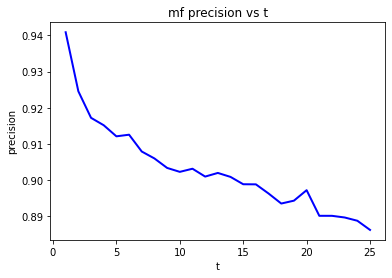

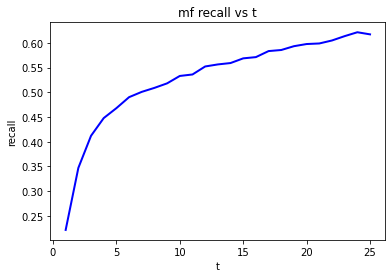

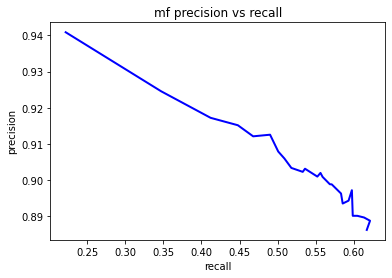

In [ ]:
plt.gcf().clear()
plt.plot(t_range, prec_mf, linewidth=2, color='b')
plt.xlabel('t')
plt.ylabel('precision')
plt.title('mf precision vs t')
plt.show()

plt.gcf().clear()
plt.plot(t_range, rec_mf, linewidth=2, color='b')
plt.xlabel('t')
plt.ylabel('recall')
plt.title('mf recall vs t')
plt.show()

plt.gcf().clear()
plt.plot(rec_mf, prec_mf, linewidth=2, color='b')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('mf precision vs recall')
plt.show()

#### Q14B

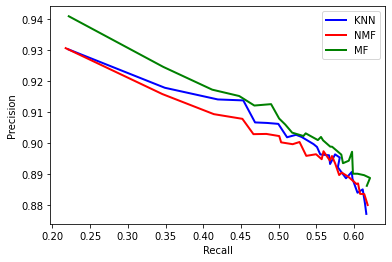

In [ ]:
fig, ax = plt.subplots()
for index in range(3):
  if index == 0:
    ax.plot(rec_knn, prec_knn, linewidth=2, color='b',label = 'KNN')
  elif index == 1:
    ax.plot(rec_nmf, prec_nmf, linewidth=2, color='r', label = "NMF")
  else:
    ax.plot(rec_mf, prec_mf, linewidth=2, color='g', label = 'MF')

plt.legend(loc='best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show() 